# Notebook 1 - Basic Functions of GemGIS

This is a first testing notebook to show the capabilities of GemGIS. This notebook is focused on converting spatial data created in GIS software such as vector and raster files into usable DataFrames for GemPy.

The following geological map will be used to illustrate the functionality.

<img src="../data/Test1/task1.png" width="300">

# Import Libraries

Apart from creating a GemPyData class, GemGIS is working with pure GeoDataFrames, Rasterio files and NumPy arrays to provide the user with an easy data handling. ***Currently, geopandas version 0.6.1 is the latest stable version that is supported by GemGIS***.

In [3]:
import sys
sys.path.append('../../gemgis')
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyvista as pv
import gemgis as gg
from matplotlib.colors import ListedColormap
from scipy.ndimage.interpolation import map_coordinates
from mpl_toolkits.axes_grid1 import make_axes_locatable

print(gg)
print(gpd.__version__)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\alexa\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<module 'gemgis' from '../../gemgis\\gemgis\\__init__.py'>
0.6.1


# Read Vector Files - Polygons

Geological Maps consisting of polygons can be loaded with GeoPandas. Currently, the functionality with respect to polygons is limited but will hopefully be extended. This will include vertices extraction and selection as well as styling of polygons.

In [2]:
geolmap = gpd.read_file('../../gemgis/data/Test1/geolmap1.shp')
image = rasterio.open('../data/Test1/task1.tif')
extent_polygon = gpd.read_file('../../gemgis/data/Test1/extent1.shp')
extent_points = gpd.read_file('../../gemgis/data/Test1/extent1_points.shp')

In [3]:
extent_polygon

,id,geometry
0,None,"POLYGON ((-0.000 1069.000, 972.000 1069.000, 9..."


In [4]:
extent_points

,id,geometry
0,None,POINT (-0.000 1069.000)
1,None,POINT (972.000 1069.000)
2,None,POINT (972.000 0.000)
3,None,POINT (0.000 -0.000)


In [5]:
extent = gg.utils.set_extent(gdf=extent_polygon)
extent

[-0.0, 972.0, -0.0, 1069.0]

In [6]:
extent = gg.utils.set_extent(gdf=extent_points)
extent

[-0.0, 972.0, -0.0, 1069.0]

In [7]:
extent = gg.utils.set_extent(0, image.read(1).shape[1], 0, image.read(1).shape[0])
extent

[0, 972, 0, 1069]

In [8]:
geolmap.crs

{'init': 'epsg:4326'}

In [9]:
geolmap.geom_type

0    Polygon
1    Polygon
2    Polygon
3    Polygon
dtype: object

(0.0, 972.0)

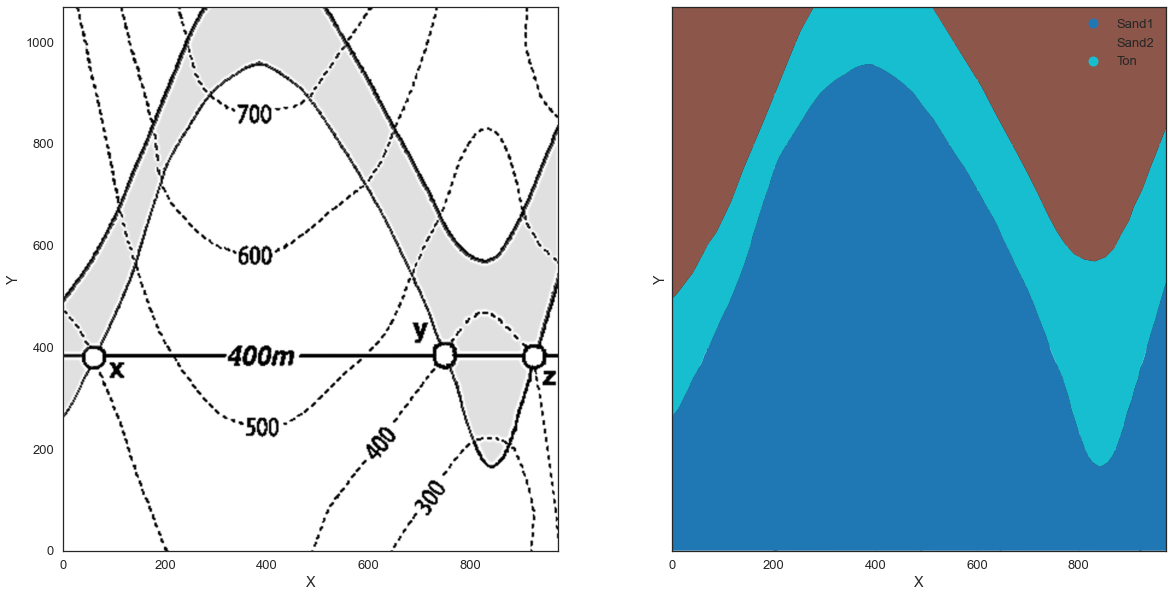

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray', extent=extent)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])
ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
geolmap.plot(ax=ax2, column = 'formation', legend = True)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

## Loading Style Files

In [11]:
cols = gg.utils.load_surface_colors('../../gemgis/data/Test1/style1.qml', geolmap)
cols

['#b35a2a', '#b35a2a', '#525252']

(0.0, 972.0)

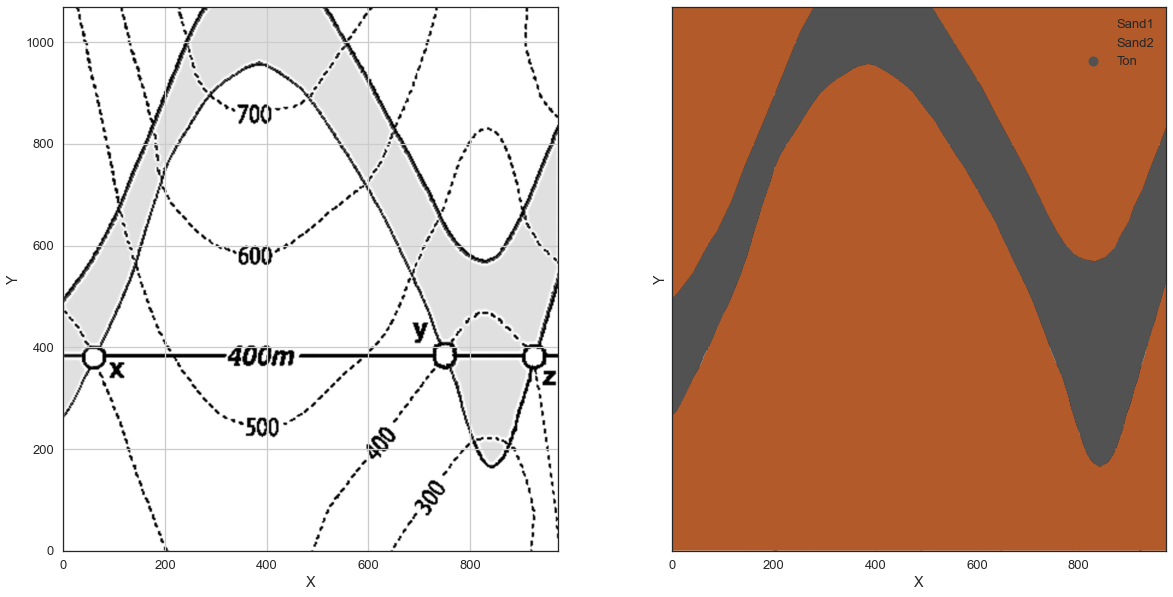

In [12]:
fig, (ax1, ax2) = plt.subplots(
    ncols=2, sharex=True, sharey=True, figsize=(20, 10))
ax1.imshow(np.flipud(image.read(1)), origin='lower',
           cmap='gray', extent=extent)
ax1.grid()
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(extent[2], extent[3])
ax1.set_xlim(extent[0], extent[1])
ax2.imshow(np.flipud(image.read(1)), origin='lower', cmap='gray')
geolmap.plot(ax=ax2, column='formation',
             legend=True, cmap=ListedColormap(cols))
ax2.grid()
# ax2.legend(geolmap['formation'])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(extent[2], extent[3])
ax2.set_xlim(extent[0], extent[1])

# Read Vector Files - Points

Interface points were selected in QGIS with their associated formation attribute. This data can now be loaded and plotted as shown below. The strength of GemGIS is it that it is working with pure GeoDataFrames providing you with their full range of functionality.

In [13]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
image = rasterio.open('../data/Test1/task1.tif')

Text(791.226498851943, 0.5, 'Y')

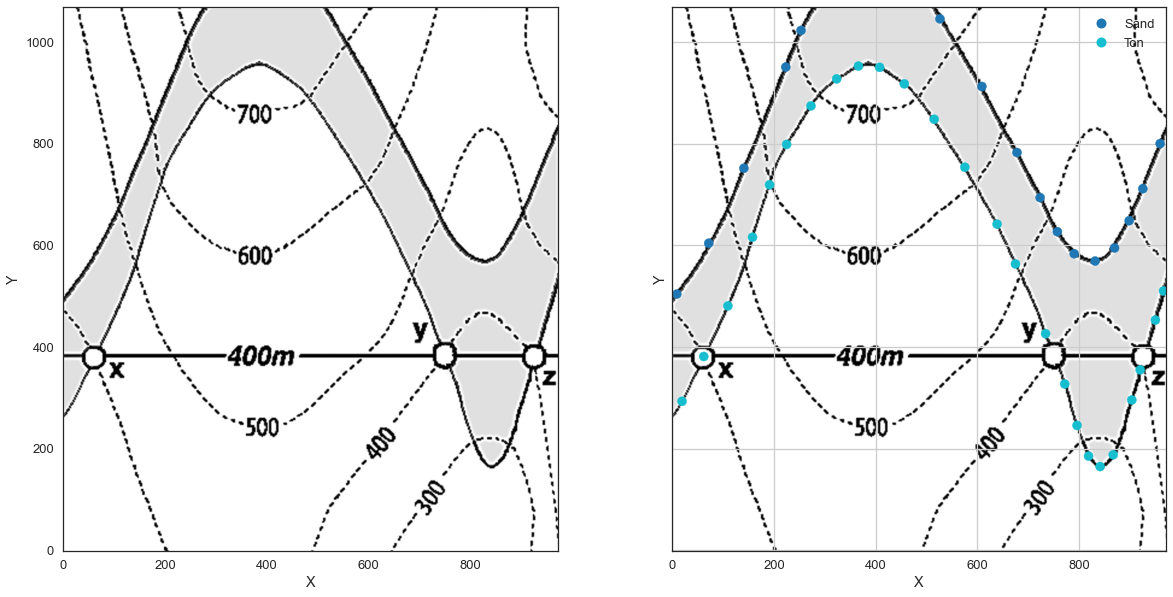

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
interfaces.plot(ax=ax2, column = 'formation', legend = True)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

The Coordinate Reference System and the Geometry Type of the Shape Files can be accessed as shown below.

In [15]:
interfaces.crs

{'init': 'epsg:4326'}

In [16]:
interfaces.geom_type.head()

0    Point
1    Point
2    Point
3    Point
4    Point
dtype: object

In [17]:
interfaces.head()

,id,formation,geometry
0,None,Ton,POINT (19.150 293.313)
1,None,Ton,POINT (61.934 381.459)
2,None,Ton,POINT (109.358 480.946)
3,None,Ton,POINT (157.812 615.999)
4,None,Ton,POINT (191.318 719.094)


## Extract X,Y coordinates

The X and Y location of the set points are stored in the geometry column. ```gg.extract_xy_values(...)``` extracts the X and Y coordinates of each point and returns a GeoDataFrame with the appended columns. 

In [18]:
interfaces = gg.vector.extract_xy(interfaces)
interfaces.head()

,id,formation,geometry,X,Y
0,None,Ton,POINT (19.150 293.313),19.15,293.31
1,None,Ton,POINT (61.934 381.459),61.93,381.46
2,None,Ton,POINT (109.358 480.946),109.36,480.95
3,None,Ton,POINT (157.812 615.999),157.81,616.00
4,None,Ton,POINT (191.318 719.094),191.32,719.09


In [19]:
ints = gg.vector.extract_xy(interfaces, inplace=True)
ints.head()

ints is interfaces

True

# Load Vector Data - LineString - Topography

A line shape file digitizing contour lines was created in QGIS. The corresponding entry in the GeoDataFrame is a line string containing a list of coordinates of the vertices. Each line has the associated height value attributed. 

In [20]:
topo = gpd.read_file('../../gemgis/data/Test1/topo1.shp')

Text(791.1840570646231, 0.5, 'Y')

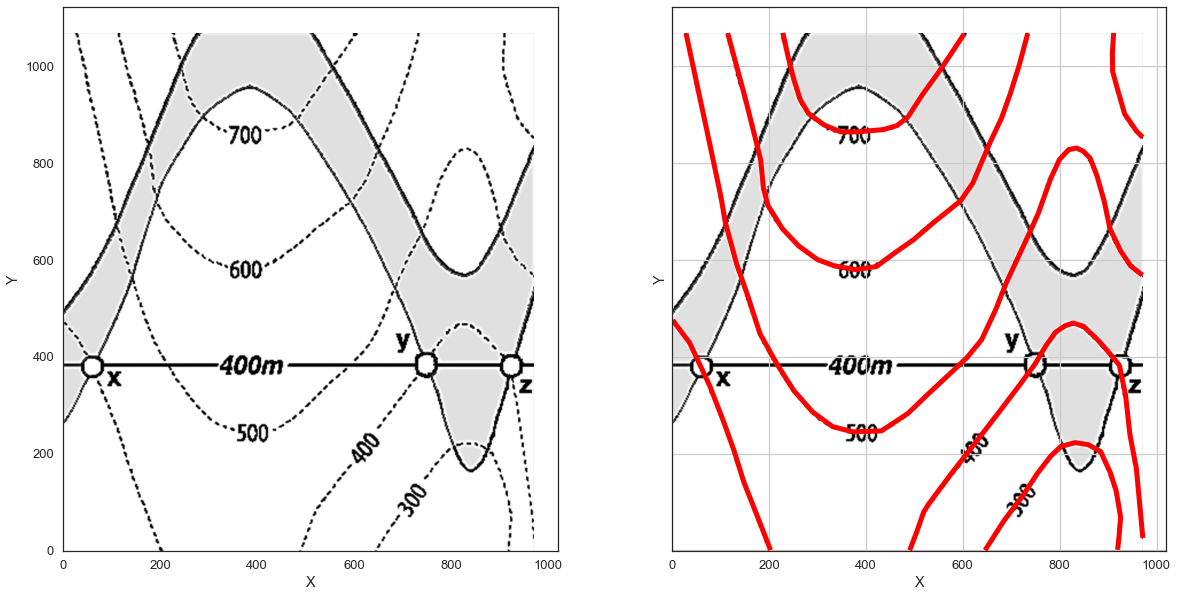

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
topo.plot(ax=ax2, color = 'red', linewidth=5)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

The Coordinate Reference System and the Geometry Type of the Shape Files can be accessed as shown below.

In [22]:
topo.crs

{'init': 'epsg:4326'}

In [23]:
topo.geom_type.head()

0    LineString
1    LineString
2    LineString
3    LineString
4    LineString
dtype: object

In [24]:
topo.head()

,id,Z,geometry
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77...."
1,None,300,"LINESTRING (645.965 0.525, 685.141 61.866, 724..."
2,None,400,"LINESTRING (490.292 0.525, 505.756 40.732, 519..."
3,None,600,"LINESTRING (911.433 1068.585, 908.856 1026.831..."
4,None,700,"LINESTRING (228.432 1068.585, 239.772 1017.037..."


## Extract X,Y coordinates

The X and Y location of the set points are stored in the geometry column within the Linestrings. gg.extract_xy_values(...) extracts the X and Y coordinates of each point in each Linestring and returns a GeoDataFrame with the appended columns. The gdf was exploded so that each point in each Linestring is now represented by one row.

In [25]:
topo = gg.vector.extract_xy(topo)
topo.head()

,id,Z,geometry,points,X,Y
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(0.7408806771479846, 475.44101474698454)",0.74,475.44
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(35.62873136073459, 429.2469161566801)",35.63,429.25
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(77.30033078835194, 340.0890755208477)",77.30,340.09
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(104.75836141895252, 269.34426719024157)",104.76,269.34
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(127.04782157791061, 207.64445718500974)",127.05,207.64


## Plot Contour Lines with PyVista

PyVista is the default 3D plotting library for GemPy. In order to get acquainted with the functionality of PyVista, simple plots of the input data are being created. A plot of the contour lines is shown below. Firstly, a plotter ```p``` is created. By passing ```notebook=True```, the resulting plot will be shown in the notebook below. ```notebook=False``` will open a new interactive window. It can be closed again by pressing 'Q' With ```p.camera_position```, the position of the camera for a plot within the notebook can be changed. 

***Hint:*** Open an interactive window and adjust the plot to a position that you like. Close the window again and you will see the camera position before you closed the window. Now paste these values into the cell and execute the cell to show the plot in the notebook. The plot is now viewed from the camera position that was set in the interactive window.

By default, we want to set the background to white and show a grid. By passing ```p.show(screenshot ='.../path.png')```, a screenshot of the plot is saved.

The contours were loaded using ```gg.plot_contours_3d(...)```. This will load a GeoDataFrame containing LineStrings or Points and plot the contour lines. Do not forget to pass the name of the plotter.

***Feel free to customize all your plots yourself!***

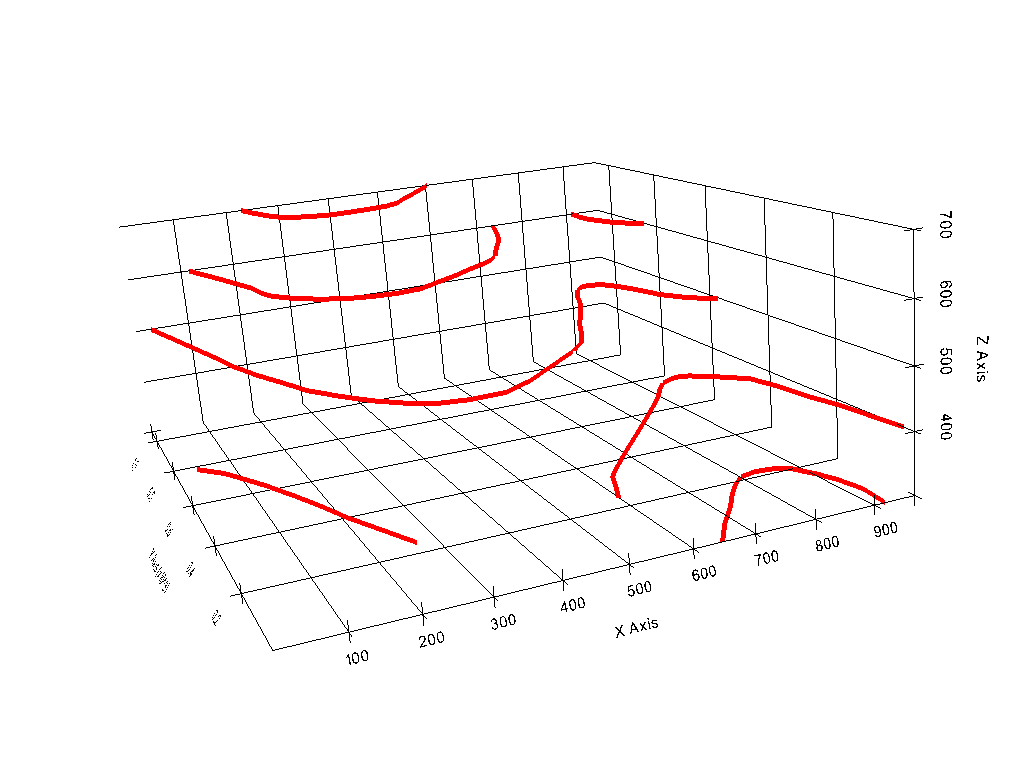

In [26]:
p = pv.Plotter(notebook =True)

gg.visualization.plot_contours_3d(topo, p, color = 'red')

p.camera_position =[(-265.62326855194965, -1658.8587591572748, 1092.2421486037606), 
                    (535.1247929028934, 496.49663272737166, 434.77098428413393), 
                    (0.17483137460875953, 0.22727872383092268, 0.9580075010907789)]

p.set_background('white')
p.show_grid(color='black')
p.show()

# Load Vector Data - LineString - Topography

A line shape file digitizing layer boundaries was created in QGIS. The corresponding entry in the GeoDataFrame is a line string containing a list of coordinates of the vertices. Each line was attributed the associated formation name of the base it represents. 

In [27]:
boundaries = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')

Text(791.226498851943, 0.5, 'Y')

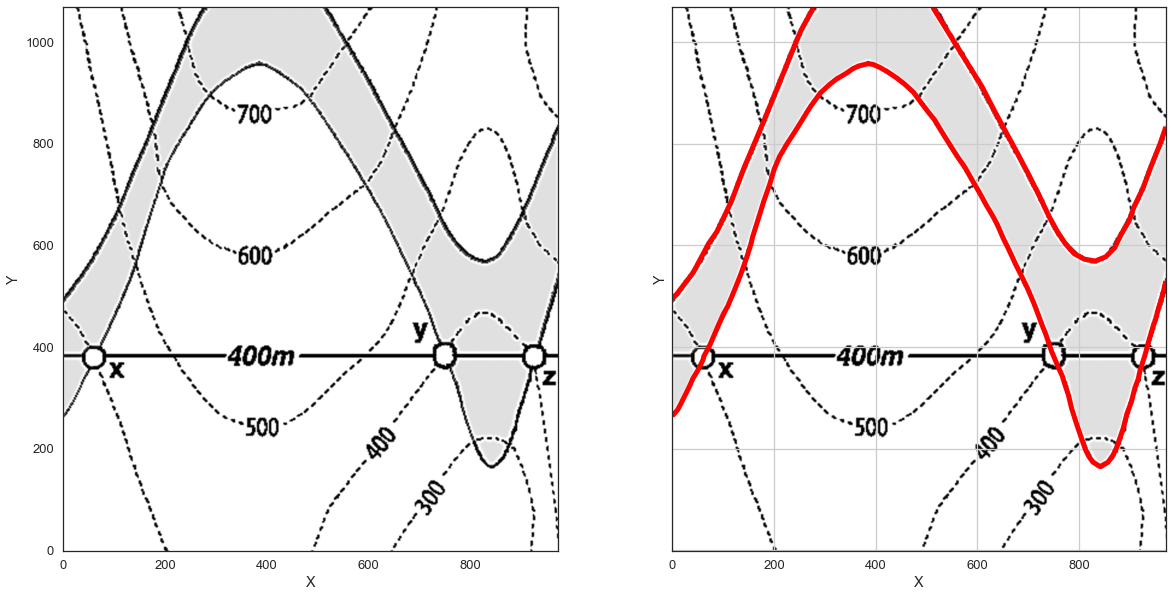

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
boundaries.plot(ax=ax2, color = 'red', linewidth=5)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

The Coordinate Reference System and the Geometry Type of the Shape Files can be accessed as shown below.

In [29]:
boundaries.crs

{'init': 'epsg:4326'}

In [30]:
boundaries.geom_type.head()

0    LineString
1    LineString
2    LineString
dtype: object

In [31]:
boundaries.head()

,id,formation,geometry
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17...."
1,None,Ton,"LINESTRING (0.188 495.787, 8.841 504.142, 41.0..."
2,None,Ton,"LINESTRING (970.677 833.053, 959.372 800.023, ..."


## Extract X,Y coordinates

The X and Y location of the set points are stored in the geometry column within the Linestrings. gg.extract_xy_values(...) extracts the X and Y coordinates of each point in each Linestring and returns a GeoDataFrame with the appended columns. The gdf was exploded so that each point in each Linestring is now represented by one row.

In [32]:
boundaries = gg.vector.extract_xy(topo)
boundaries.head()

,id,Z,geometry,points,X,Y
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(0.7408806771479846, 475.44101474698454)",0.74,475.44
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(35.62873136073459, 429.2469161566801)",35.63,429.25
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(77.30033078835194, 340.0890755208477)",77.30,340.09
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(104.75836141895252, 269.34426719024157)",104.76,269.34
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(127.04782157791061, 207.64445718500974)",127.05,207.64


# Read Digital Elevation Model

Digital elevation models (DEMs) are read in with rasterio and will be processed as such. One typical raster file format is tif. The raster loaded here was created in ArcGIS from the contour lines shown above. We will later demonstrate how to interpolate a raster directly from contour lines and use it in GemPy. 

In [33]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
dem.read(1).shape

(275, 250)

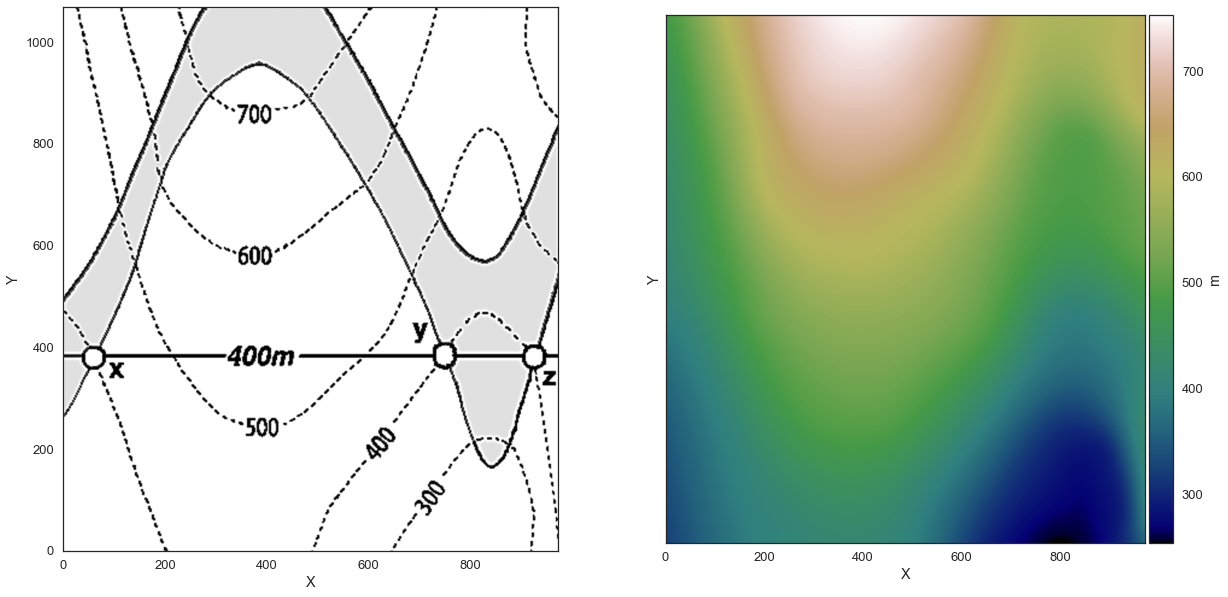

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(np.flipud(dem.read(1)), origin = 'lower', cmap ='gist_earth', extent = [0,image.shape[1], 0, image.shape[0]])

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

## Plot DEM with PyVista

The digital elevation model can be plotted as mesh in PyVista using ```gg.plot_dem_3d```. Please be aware that the DEM must have the same dimensions as the input image or the extent of the other data. Alternatively, by passing an variable to the argument ```array```, the DEM will be rescaled to fit to the extent of the geological map. 

In [35]:
p = pv.Plotter(notebook =True)
# texture = pv.read_texture('../data/Test1/task1.png')
gg.visualization.plot_dem_3d(dem, p, cmap = 'gist_earth', array=image.read(1))
gg.visualization.plot_contours_3d(topo, p, color = 'red', add_to_z = 10)

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]

p.set_background('white')
p.show_grid(color='black')
p.show()

TypeError: plot_dem_3d() missing 1 required positional argument: 'extent'

The Coordinate Reference System and the Geometry Type of the Shape Files can be accessed as shown below.

In [ ]:
dem.crs

# Extracting height information from DEM

Using the interfaces shape file and the DEM, the height information of the points, assuming they were recorded on the surface, can be obtained from the DEM by using ```gg.extract_z_values(...)```.

In [ ]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
boundaries = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')

In [ ]:
interfaces = gg.vector.extract_z(interfaces, dem)
interfaces.head()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
interfaces.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(np.flipud(dem.read(1)), origin = 'lower', cmap ='gist_earth', extent = [0,image.shape[1], 0, image.shape[0]])
interfaces.plot(ax=ax2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

In [ ]:
boundaries.head()

In [ ]:
boundaries = gg.vector.extract_xy(boundaries)
boundaries

In [ ]:
boundaries = gg.vector.extract_z(boundaries, dem)
boundaries.head()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
boundaries.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(np.flipud(dem.read(1)), origin = 'lower', cmap ='gist_earth', extent = [0,image.shape[1], 0, image.shape[0]])
boundaries.plot(ax=ax2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

# Plot Interfaces and Layer Boundaries with PyVista

In [ ]:
p = pv.Plotter(notebook =True)
# texture = pv.read_texture('../data/Test1/task1.png')
gg.visualization.plot_dem_3d(dem, p, cmap = 'gist_earth', array=image.read(1))
gg.visualization.plot_contours_3d(topo, p, color = 'red', add_to_z = 10)
gg.visualization.plot_points_3d(interfaces, p, color = 'blue', add_to_z = 10)
gg.visualization.plot_contours_3d(boundaries, p, color = 'blue', add_to_z = 10)

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]
p.set_background('white')
p.show_grid(color='black')
p.show()

# Extract coordinates and heights from DEM

Both coordinates and heights can also be extracted directly the GeoDataFrame and the DEM with ```gg.extract_coordinates(...)```.

In [ ]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
boundaries = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')

In [ ]:
interfaces = gg.vector.extract_coordinates(interfaces, dem)
interfaces.head()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
interfaces.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(np.flipud(dem.read(1)), origin = 'lower', cmap ='gist_earth', extent = [0,image.shape[1], 0, image.shape[0]])
interfaces.plot(ax=ax2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

In [ ]:
boundaries = gg.vector.extract_coordinates(boundaries, dem)
boundaries.head()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
boundaries.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(np.flipud(dem.read(1)), origin = 'lower', cmap ='gist_earth', extent = [0,image.shape[1], 0, image.shape[0]])
boundaries.plot(ax=ax2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

# Define Custom Sections

Custom Sections in GemPy are defined by a start point and an end point. A shape file containing either point pairs or a straight line can directly be converted if a Section name is provided for the respective points. In the plot below, the endpoints are marked by red dots.

In [ ]:
custom_sections = gpd.read_file('../../gemgis/data/Test1/customsections1.shp')

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray', extent = [0,image.shape[1], 0, image.shape[0]])
custom_sections.plot(ax=ax2, color = 'red', markersize = 500)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

## Inspection of Geometry Type

In [ ]:
custom_sections.geom_type.head()

## Inspection of Custom Sections

In [ ]:
custom_sections

## Adding a section_name to the endpoints

In [ ]:
custom_sections['section_name'] = 'SectionA'
custom_sections

## Creating a Section dict

In [ ]:
section_dict = gg.utils.to_section_dict(custom_sections, 'section_name')
section_dict

In [ ]:
section_dict['SectionA']

In [ ]:
section_dict.values()

In [ ]:
len(section_dict)

## GeoDataFrame with multiple point pairs

In [ ]:
sections = pd.concat([custom_sections,custom_sections,custom_sections])
sections['section_name'].iloc[2] ='SectionB'
sections['section_name'].iloc[3] ='SectionB'
sections['section_name'].iloc[4] ='SectionC'
sections['section_name'].iloc[5] ='SectionC'
sections

## Creating a Section Dict

In [ ]:
section_dict = gg.utils.to_section_dict(sections, section_column = 'section_name')
section_dict

In [ ]:
type(('Layer1'))

## Create custom sections from lines

In [ ]:
custom_sections = gpd.read_file('../../gemgis/data/Test1/customsection1_line.shp')

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray', extent = [0,image.shape[1], 0, image.shape[0]])
custom_sections.plot(ax=ax2, color = 'red', linewidth = 5)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

## Inspection of Geometry Type

In [ ]:
custom_sections.geom_type.head()

## Inspection of Custom Sections

In [ ]:
custom_sections

In [ ]:
gg.vector.extract_xy(custom_sections)

# Create Section Dict

In [ ]:
section_dict1 = gg.utils.to_section_dict(custom_sections, section_column='section')
section_dict1

# Merge Section Dicts

Dictionaries can easily be merged. ***Beware that the keys of sections in different dictionaries must not be identical!***

In [ ]:
section_dict

In [ ]:
section_dict1

In [ ]:
new_dict = dict(section_dict)
new_dict.update(section_dict1)
new_dict

# Interpolate Raster

If no digital model of a surface is present and ArcGIS is not an option, rasters can also be directly interpolated in GemGIS. Several scipy.interpolate.griddata methods were implemented for the raster interpolation. 

In [ ]:
topo = gpd.read_file('../../gemgis/data/Test1/topo1.shp')
topo.head()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
topo.plot(ax=ax2)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

In [ ]:
array_linear = gg.vector.interpolate_raster(topo)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
topo.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(array_linear, origin='lower', cmap = 'gist_earth')
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

In [ ]:
array_linear2 = gg.vector.interpolate_raster(topo, method = 'linear')

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
topo.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(array_linear2, origin='lower', cmap = 'gist_earth')
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

In [ ]:
array_cubic = gg.vector.interpolate_raster(topo, method = 'cubic')

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
topo.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(array_cubic, origin='lower', cmap = 'gist_earth')
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

In [ ]:
array_rbf = gg.vector.interpolate_raster(topo, method = 'rbf')

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
topo.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(array_rbf, origin='lower', cmap = 'gist_earth')
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')
np.save('../data/Test1/array_rbf.npy', array_rbf)

In [ ]:
array_rbf_linear = gg.vector.interpolate_raster(topo, method = 'rbf', function = 'linear')

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
topo.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
img = ax2.imshow(array_rbf_linear, origin='lower', cmap = 'gist_earth')
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

# Calculate Hillshades, Slope and Aspect

Hillshades, the slope and the aspect of a DEM can be calculated to firstly display topographic features and to obtain orientation information for the respective surface. 

In [ ]:
hillshades = gg.raster.calculate_hillshades(array_rbf, [0,972,0,1069])
hillshades

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,10))
arr = ax1.imshow(array_rbf, origin='lower')
topo.plot(ax=ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(0,array_rbf.shape[1])
ax1.set_ylim(0,array_rbf.shape[0])
fig.colorbar(arr, ax=ax1, cax=cax)
hill = ax2.imshow(hillshades, origin='lower', cmap = 'gray')
topo.plot(ax=ax2)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax1.set_xlim(0,hillshades.shape[1])
ax1.set_ylim(0,hillshades.shape[0])
fig.colorbar(hill, ax=ax2,cax=cax)
plt.subplots_adjust(wspace = 0.4)

In [ ]:
slope = gg.raster.calculate_slope(array_rbf, [0,972,0,1069])
slope

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,10))
ax1.imshow(array_rbf, origin='lower')
topo.plot(ax=ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(0,array_rbf.shape[1])
ax1.set_ylim(0,array_rbf.shape[0])
fig.colorbar(arr, ax=ax1,cax=cax)
slo = ax2.imshow(slope, origin='lower', cmap = 'RdYlBu_r', vmin=0, vmax=90)
topo.plot(ax=ax2)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax1.set_xlim(0,slope.shape[1])
ax1.set_ylim(0,slope.shape[0])
fig.colorbar(slo, ax=ax2,cax=cax)
plt.subplots_adjust(wspace = 0.4)

In [ ]:
aspect = gg.raster.calculate_aspect(array_rbf, [0,972,0,1069])
aspect

In [ ]:
array = gg.vector.interpolate_raster(topo, method = 'rbf', function = 'linear')
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,10))
arr = ax1.imshow(array_rbf, origin='lower')
topo.plot(ax=ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(0,array_rbf.shape[1])
ax1.set_ylim(0,array_rbf.shape[0])
fig.colorbar(arr, ax=ax1,cax=cax)
asp = ax2.imshow(aspect, origin='lower', cmap = 'gist_earth', vmin = 0, vmax= 360)
topo.plot(ax=ax2)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_xlim(0,aspect.shape[1])
ax2.set_ylim(0,aspect.shape[0])
fig.colorbar(asp, ax=ax2,cax=cax)
plt.subplots_adjust(wspace = 0.4)

In [ ]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')

In [ ]:
hillshades = gg.raster.calculate_hillshades(dem)
hillshades

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,10))
arr = ax1.imshow(np.flipud(dem.read(1)), origin='lower', extent = extent)
topo.plot(ax=ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

fig.colorbar(arr, ax=ax1, cax=cax)
hill = ax2.imshow(np.flipud(hillshades), origin='lower', cmap = 'gray',extent = extent)
topo.plot(ax=ax2)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
fig.colorbar(hill, ax=ax2,cax=cax)
plt.subplots_adjust(wspace = 0.4)

In [ ]:
slope = gg.raster.calculate_slope(dem)
slope

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,10))
arr = ax1.imshow(np.flipud(dem.read(1)), origin='lower', extent = extent)
topo.plot(ax=ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
fig.colorbar(arr, ax=ax1, cax=cax)
hill = ax2.imshow(np.flipud(slope), origin='lower', cmap = 'RdYlBu_r',extent = extent, vmin=0, vmax=90)
topo.plot(ax=ax2)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
fig.colorbar(hill, ax=ax2,cax=cax)
plt.subplots_adjust(wspace = 0.4)

In [ ]:
aspect = gg.raster.calculate_aspect(dem)
aspect

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,10))
arr = ax1.imshow(np.flipud(dem.read(1)), origin='lower', extent = extent)
topo.plot(ax=ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
fig.colorbar(arr, ax=ax1, cax=cax)
hill = ax2.imshow(np.flipud(aspect), origin='lower', cmap = 'gist_earth',extent = extent, vmin=0, vmax=360)
topo.plot(ax=ax2)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.grid()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
fig.colorbar(hill, ax=ax2,cax=cax)
plt.subplots_adjust(wspace = 0.4)

# Calculating the difference between rasters

It is also possible to calculate the difference between two given rasters. If the rasters do not have the same shape, the smaller raster will be scaled accordingly. Set ```flip_array = True``` to flip the second array in case it is the wrong way around.

In [ ]:
diff = gg.raster.calculate_difference(array_rbf, dem.read(1), flip_array=True)

In [ ]:
print(array.shape)
print(dem.read(1).shape)
print(dem.read(1).min())
print(dem.read(1).max())

In [ ]:
plt.imshow(np.flipud(diff), vmin= -20, vmax=20)
plt.colorbar()

# Extracting height information from DEM

Using the interfaces shape file and the DEM, the height information of the points, assuming they were recorded on the surface, can be obtained from the DEM by using ```gg.extract_z_values(...)```.

In [ ]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
boundaries = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')

In [ ]:
interfaces1 = gg.vector.extract_z(interfaces, dem)
interfaces1.head()

In [ ]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
boundaries = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')

In [ ]:
interfaces2 = gg.vector.extract_z(interfaces, array_rbf, extent = extent)
interfaces2.head()

In [ ]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
boundaries = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')

In [ ]:
interfaces3 = gg.vector.extract_coordinates(interfaces, array_rbf, extent = extent)
interfaces3.head()

# Sample Orientations from Raster

In [ ]:
point = [750, 750]
value = gg.raster.sample(array_rbf, extent, point)
value

In [ ]:
value, point = gg.raster.sample_randomly(array_rbf, extent)
value, point

In [ ]:
type(gg.raster.sample_randomly(array_rbf, extent))

In [ ]:
np.random.seed(1)

orientations = gg.raster.sample_orientations(array_rbf, extent, random_samples=10, formation='Mudstone')
orientations

In [ ]:
plt.imshow(array_rbf, origin='lower', extent = extent)
plt.scatter(orientations.X, orientations.Y, color = 'red')
plt.grid()

In [ ]:
value = gg.raster.sample_orientations(array_rbf, extent, random_samples=1)
value

In [ ]:
value= gg.raster.sample_orientations(array_rbf, extent, points = [[200,300],[300,400],[400,500]], formation = 'Sandstone')
value

In [ ]:
value= gg.raster.sample_orientations(array_rbf, extent, points = [[200,300],[300,400]])
value

In [ ]:
df= gg.raster.sample_orientations(array_rbf, extent, points = [200,300])
df

In [ ]:
df = gg.raster.sample_orientations(array_rbf, extent, points=[205,305])
df

# Plotting Orientation Values

In [ ]:
dip = np.random.uniform(45,65,100)
azimuth = np.random.uniform(0,45,100)
gdf = pd.DataFrame(data= np.array([dip,azimuth]).T, columns=['dip', 'azimuth'])
gdf['formation'] = 'Sand'
gdf['formation'][51:]='Clay'
gdf.head()

In [ ]:
gg.visualization.plot_orientations(gdf)

In [ ]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
dem

In [ ]:
extent = [0, 972, 0, 1069]
extent

In [ ]:
gdf = gg.raster.sample_orientations(dem, extent, random_samples=100)
gdf.loc[0:51,'formation'] = 'Layer1'
gdf.loc[51:,'formation'] = 'Layer2'
gdf

import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111, projection='polar')

norm = (gdf['dip']-min(gdf['dip']))/(max(gdf['dip'])-min(gdf['dip']))

c = ax.scatter(gdf['azimuth']-90, norm, cmap='Blues_r', alpha=0.75)



# Sample Interfaces from Raster

In [ ]:
np.random.seed(2)

interfaces = gg.raster.sample_interfaces(array_rbf, extent, random_samples=10, formation='Mudstone')
interfaces

In [ ]:
plt.imshow(array_rbf, origin='lower', extent = extent)
plt.scatter(interfaces.X, interfaces.Y, color = 'red')
plt.grid()

In [ ]:
value = gg.raster.sample_interfaces(array_rbf, extent, random_samples=1)
value

In [ ]:
value= gg.raster.sample_interfaces(array_rbf, extent, points = [[200,300],[300,400],[400,500]], formation = 'Sandstone')
value

In [ ]:
value= gg.raster.sample_interfaces(array_rbf, extent, points = [[200,300],[300,400]])
value

In [ ]:
df= gg.raster.sample_interfaces(array_rbf, extent, points = [200,300])
df

In [ ]:
df = gg.raster.sample_interfaces(array_rbf, extent, points=[205,305])
df

# Saving a raster as GeoTiff

In [ ]:
plt.imshow(array_rbf, origin='lower', extent = extent)
plt.grid()

In [ ]:
extent = [0, 972, 0, 1069]
extent

In [ ]:
array_rbf.shape

In [ ]:
minx, miny, maxx, maxy = extent[0], extent[2], extent[1], extent[3]
print(minx, miny, maxx, maxy) 

transform = rasterio.transform.from_bounds(minx, miny, maxx, maxy, array_rbf.shape[1], array_rbf.shape[0])
transform

In [ ]:
gg.raster.save_as_tiff('../data/Test1/array_rbf.tif', array_rbf, extent, 'EPSG:4326')

In [ ]:
tiff_array_rbf = rasterio.open('../../gemgis/data/Test1/array_rbf.tif')

In [ ]:
tiff_array_rbf

In [ ]:
plt.imshow(tiff_array_rbf.read(1), origin='lower', extent = extent)
plt.grid()

In [ ]:
transform = rasterio.transform.from_bounds(minx, miny, maxx, maxy, array_rbf.shape[1], array_rbf.shape[0])
print(transform)
transform = rasterio.transform.from_origin(minx, maxy, 1,1)
print(transform)

In [ ]:
tiff_array_rbf.transform

In [ ]:
tiff_array_rbf.bounds

In [ ]:
from rasterio.plot import show
show(tiff_array_rbf.read(), transform=tiff_array_rbf.transform)

In [ ]:
show(tiff_array_rbf)

# Clip Raster by extent/shape

In [ ]:
extent = [800, 1069, 800, 1172]
print(extent)
minx, miny, maxx, maxy = extent[0], extent[2], extent[1], extent[3]
print(minx, miny, maxx, maxy) 

In [ ]:
plt.imshow(tiff_array_rbf.read(1), origin = 'lower')
plt.grid()

In [ ]:
bbox = [0, 400, 600, 972]
# bbox = [662, 1062, 600, 972]
clipped_raster = gg.raster.clip_by_extent(tiff_array_rbf, 
                                               bbox, 
                                               bbox_crs = tiff_array_rbf.crs, 
                                               save = True, 
                                               path = '../data/Test1/clipped.tif' )
plt.imshow(clipped_raster,origin='lower', vmin=tiff_array_rbf.read(1).min(), vmax=tiff_array_rbf.read(1).max())
clipped_raster.shape

In [ ]:
bbox = [0, 400, 600, 972]
clipped_raster = gg.raster.clip_by_extent(tiff_array_rbf.read(1),
                                               bbox, 
                                               bbox_crs = tiff_array_rbf.crs, 
                                               save = True, 
                                               path = '../data/Test1/clipped.tif',
                                               extent_raster = [0,972,0,1069])
plt.imshow(clipped_raster,origin = 'lower',vmin=tiff_array_rbf.read(1).min(), vmax=tiff_array_rbf.read(1).max())
clipped_raster.shape

# Clip GeoDataFrame by Extent/Shape

In [ ]:
random_points = gpd.read_file('../../gemgis/data/Test1/randompoints1.shp')
random_lines = gpd.read_file('../../gemgis/data/Test1/randomlines1.shp')
image = rasterio.open('../data/Test1/task1.tif')
extent_polygon = gpd.read_file('../../gemgis/data/Test1/extent1.shp')

In [ ]:
extent = gg.utils.set_extent(0, image.read(1).shape[1], 0, image.read(1).shape[0])
extent

In [ ]:
random_points.head()

In [ ]:
random_points_clipped = gg.vector.clip_by_extent(random_points, extent)
random_points_clipped.head()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
random_points.plot(ax=ax1, color='red')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(-350,1400)
ax1.set_xlim(-350,1200)
ax1.grid()
ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
random_points_clipped.plot(ax=ax2, color='red')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(-350,1400)
ax2.set_xlim(-350,1200)
ax2.grid()

In [ ]:
random_points_clipped = gg.vector.clip_by_shape(random_points, extent_polygon)
random_points_clipped.head()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
random_points.plot(ax=ax1, color='red')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(-350,1400)
ax1.set_xlim(-350,1200)
ax1.grid()
ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
random_points_clipped.plot(ax=ax2, color='red')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(-350,1400)
ax2.set_xlim(-350,1200)
ax2.grid()

Lines as representation of connected vertices in the form of layer boundaries can also be clipped. The vertices inside the extent are kept while the ones outside are discarded. 

In [ ]:
random_lines_clipped = gg.vector.clip_by_extent(random_lines, extent)
random_lines_clipped.head()

In [ ]:
random_lines = gg.vector.extract_xy(random_lines)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
ax1.scatter(random_lines.X, random_lines.Y, color='red')
random_lines.plot(ax=ax1, color='red')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(-350,1400)
ax1.set_xlim(-350,1200)
ax1.grid()
ax2.imshow(np.flipud(image.read(1)), origin = 'lower', cmap ='gray')
ax2.scatter(random_lines_clipped.X, random_lines_clipped.Y, color='red')
random_lines_clipped.plot(ax=ax2, color='red')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(-350,1400)
ax2.set_xlim(-350,1200)
ax2.grid()

# Load WMS Service

A WMS or We Map Service is an online service storing spatial data such as DEMs, satellite data or polygons of geological maps. They can be accessed via an URL and can be loaded into GemGIS.

In [ ]:
wms = gg.wms.load('https://ows.terrestris.de/osm/service?')
type(wms)

In [ ]:
wms.version

In [ ]:
list(wms.contents)

In [ ]:
wms.identification.type

In [ ]:
wms.identification.version

In [ ]:
wms.identification.title

In [ ]:
wms.identification.abstract

In [ ]:
wms.getOperationByName('GetMap').methods

In [ ]:
wms.getOperationByName('GetMap').formatOptions

In [ ]:
wms['OSM-WMS'].title

In [ ]:
wms['OSM-WMS'].crsOptions

In [ ]:
wms['OSM-WMS'].styles

In [ ]:
wms['OSM-WMS'].boundingBox

In [ ]:
wms['OSM-WMS'].boundingBoxWGS84

In [ ]:
wms['OSM-WMS'].opaque

In [ ]:
wms['OSM-WMS'].queryable

In [ ]:
wms_map = gg.wms.load_as_map('https://ows.terrestris.de/osm/service?',
                             'OSM-WMS', 'default', 'EPSG:4326', [4.5, 7.5, 49, 52], [1000, 1000], 'image/png')
type(wms_map)

In [ ]:
import io
maps = io.BytesIO(wms_map.read())
array = plt.imread(maps)
plt.figure(figsize = (10,10))
plt.imshow(array)

# Rescaling Images

In [ ]:
from skimage.transform import resize
import rasterio

dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')

plt.imshow(dem.read(1))

In [ ]:
new_dem = resize(dem.read(1), (1069,972))

In [ ]:
plt.imshow(new_dem)

In [ ]:
extent = [0,972,0,1069]

In [ ]:
 (extent[3]-extent[2],extent[1]-extent[0])

# Calculate strike lines based on points

In [ ]:
from shapely.geometry import Point, LineString
from shapely import geometry, ops

In [ ]:
points = gpd.read_file('../../gemgis/data/Test1/points_strike.shp')
# points = points.sort_values('Z')
points

In [ ]:
def create_linestring(gdf, formation, altitude):

    gdf_new = gdf.copy(deep=True)

    gdf_new = gdf_new[gdf_new['formation'] == formation]
    gdf_new = gdf_new[gdf_new['Z'] == altitude]
    linestring = LineString(gdf_new.geometry.to_list())

    return linestring


def create_linestring_gdf(gdf):

    gdf_new = gdf.copy(deep=True)
    gdf_new = gdf_new.sort_values('Z')
    linestrings = []

    for i in gdf_new['formation'].unique().tolist():
        for j in gdf_new['Z'].unique().tolist():
            linestring = create_linestring(gdf_new, i, j)
            linestrings.append(linestring)

    gdf_linestrings = gpd.GeoDataFrame(geometry=linestrings)
    gdf_linestrings['Z'] = gdf_new['Z'].unique()

    return gdf_linestrings


# line = create_linestring(points, 'Ton', 400)
# line

linestring_gdf = create_linestring_gdf(points)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.flipud(image.read(1)), origin='lower', cmap='gray')
linestring_gdf.plot(ax=ax, linewidth=8, color='red')
plt.grid()
linestring_gdf.to_file('../../gemgis/data/Test1/lines_strike.shp')
linestring_gdf

In [ ]:
type(create_linestring(points, 'Ton', 300))

In [ ]:
def calculate_angle(gdf):

    dist = gdf.distance(gdf.shift()).to_list()[1:]
    angles = []
    for j in range(len(dist)):
        angle = np.rad2deg(
            np.arctan((linestring_gdf['Z'][j+1]-linestring_gdf['Z'][j])/dist[j]))
        angles.append(angle)
    return angles
    calculate_angle(linestring_gdf)


linestring_gdf.distance(linestring_gdf.shift())

dips = calculate_angle(linestring_gdf)
dips


In [ ]:
np.rad2deg(np.arctan(100/170))

# Web Coverage Service

In [ ]:
from owslib.wcs import WebCoverageService

In [ ]:
wcs = WebCoverageService('https://www.wcs.nrw.de/geobasis/wcs_nw_dgm',version='2.0.1')

In [ ]:
print(wcs.contents.keys())

In [ ]:
wcs.contents['nw_dgm'].boundingboxes

In [ ]:
wcs.contents['nw_dgm'].grid.axislabels

In [ ]:
wcs.contents['nw_dgm'].grid.dimension

In [ ]:
wcs.contents['nw_dgm'].grid.lowlimits

In [ ]:
wcs.contents['nw_dgm'].grid.highlimits

In [ ]:
wcs.version

In [ ]:
wcs.provider.name

In [ ]:
wcs.identification.title

In [ ]:
dem = wcs['nw_dgm']

In [ ]:
wcs['nw_dgm'].boundingBoxWGS84

In [ ]:
wcs['nw_dgm'].boundingboxes[0]['nativeSrs']


In [ ]:
wcs['nw_dgm'].supportedFormats

In [ ]:
output=wcs.getCoverage(identifier='nw_gdm',
bbox=(286000, 328000,5620000,5648000), format='image/tiff', crs='EPSG:25832', width = 100, height = 100)

In [10]:
from owslib.wcs import WebCoverageService
service = 'https://www.wcs.nrw.de/geobasis/wcs_nw_dgm'
wcs = WebCoverageService('https://www.wcs.nrw.de/geobasis/wcs_nw_dgm',version='2.0.1')
def return_url(service, version, identifier, form, extent, name):
    
    url = service + '?' + \
    'REQUEST=GetCoverage' + '&' + \
    'SERVICE=WCS' + '&' + \
    'VERSION=' + str(version) + '&' + \
    'COVERAGEID=' + identifier + '&' + \
    'FORMAT=' + form + '&' + \
    'SUBSET=x(' + str(extent[0]) + ',' + str(extent[1]) + ')' + '&' +\
    'SUBSET=y(' + str(extent[2]) + ',' + str(extent[3]) + ')' + '&' +\
    'OUTFILE=' + name
    return url

url = return_url('https://www.wcs.nrw.de/geobasis/wcs_nw_dgm', wcs.version, 'nw_dgm', 'image/tiff',[290000, 292000,5625000,5627000], 'test')
url

'https://www.wcs.nrw.de/geobasis/wcs_nw_dgm?REQUEST=GetCoverage&SERVICE=WCS&VERSION=2.0.1&COVERAGEID=nw_dgm&FORMAT=image/tiff&SUBSET=x(290000,292000)&SUBSET=y(5625000,5627000)&OUTFILE=test'

In [37]:
import urllib.request
# req = urllib.request.urlopen(url)
file = urllib.request.urlretrieve(url, 'test.tif')
file

('test.tif', <http.client.HTTPMessage at 0x20cae358288>)

In [1]:
xmin = 368000
xmax = 478000
ymin = 5718000
ymax = 5788000

In [5]:
wms = gg.wms.load('https://ows.terrestris.de/osm/service?')

In [6]:
wms_map = gg.wms.load_as_array('https://ows.terrestris.de/osm/service?',
                             'OSM-WMS', 'default', 'EPSG:25832', [300000, 500000,5700000,5780000], [2000, 2000], 'image/png')

### Plot WMS Data

Text(0.5, 0, 'X [m]')

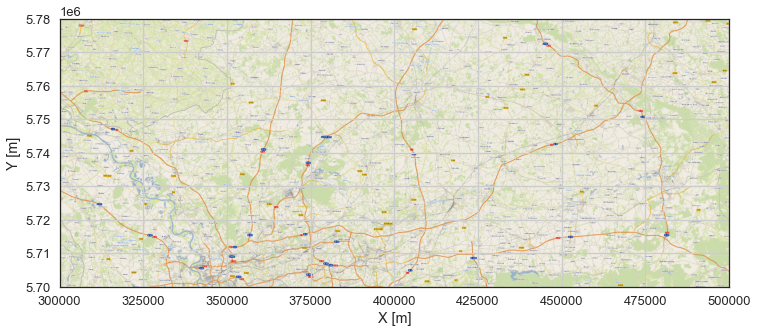

In [8]:
plt.figure(figsize = (12,12))
plt.imshow(wms_map, extent= [300000, 500000,5700000,5780000])
plt.grid()
plt.ylabel('Y [m]')
plt.xlabel('X [m]')
# plt.text(294500,5629750, 'Aachen', size = 14)

In [38]:
import urllib.request
# xmin = 368000
# xmax = 478000
# ymin = 5718000
# ymax = 5788000

# [478000,500000,5700000,5788000]

xmin = 478000
xmax = 500000
ymin = 5700000
ymax = 5788000

x = xmax-xmin
print(x)
y = ymax-ymin
print(y)

print(int(x/2000))
print(int(y/2000))

for i in range(int(x/2000)):
    for j in range(int(y/2000)):
        url = return_url('https://www.wcs.nrw.de/geobasis/wcs_nw_dgm', wcs.version, 'nw_dgm', 'image/tiff',[xmin+i*2000, xmin+(i+1)*2000,ymin+j*2000, ymin+(j+1)*2000], 'test')
        urllib.request.urlretrieve(url, 'C:/users/alexa/Desktop/Muenster/tile_%d_%d_%d_%d.tif' % (xmin+i*2000, xmin+(i+1)*2000,ymin+j*2000, ymin+(j+1)*2000))

22000
88000
11
44


In [12]:
import os
from rasterio.merge import merge

dirpath = 'C:/users/alexa/Desktop/Muenster'
search_criteria = "tile*.tif"
q = os.path.join(dirpath, search_criteria)
print(q)

C:/users/alexa/Desktop/Muenster\tile*.tif


In [30]:
import glob
dem_fps = glob.glob(q)
dem_fps[:10]

['C:/users/alexa/Desktop/Muenster\\tile_360000_362000_5700000_5702000.tif',
 'C:/users/alexa/Desktop/Muenster\\tile_360000_362000_5702000_5704000.tif',
 'C:/users/alexa/Desktop/Muenster\\tile_360000_362000_5704000_5706000.tif',
 'C:/users/alexa/Desktop/Muenster\\tile_360000_362000_5706000_5708000.tif',
 'C:/users/alexa/Desktop/Muenster\\tile_360000_362000_5708000_5710000.tif',
 'C:/users/alexa/Desktop/Muenster\\tile_360000_362000_5710000_5712000.tif',
 'C:/users/alexa/Desktop/Muenster\\tile_360000_362000_5712000_5714000.tif',
 'C:/users/alexa/Desktop/Muenster\\tile_360000_362000_5714000_5716000.tif',
 'C:/users/alexa/Desktop/Muenster\\tile_360000_362000_5716000_5718000.tif',
 'C:/users/alexa/Desktop/Muenster\\tile_360000_362000_5718000_5720000.tif']

In [31]:
import rasterio
src_files_to_mosaic = []
from tqdm import tqdm
for fp in tqdm(range(len(dem_fps))):
# for fp in tqdm(range(2000)):
    src = rasterio.open(dem_fps[fp])
    src_files_to_mosaic.append(src)
    
# src_files_to_mosaic = [rasterio.open(fp) for fp in dem_fps]

100%|██████████████████████████████████████████████████████████████████████████████| 2596/2596 [05:49<00:00,  7.44it/s]


In [32]:
mosaic, out_trans = merge(src_files_to_mosaic, res=50, nodata= -9999)

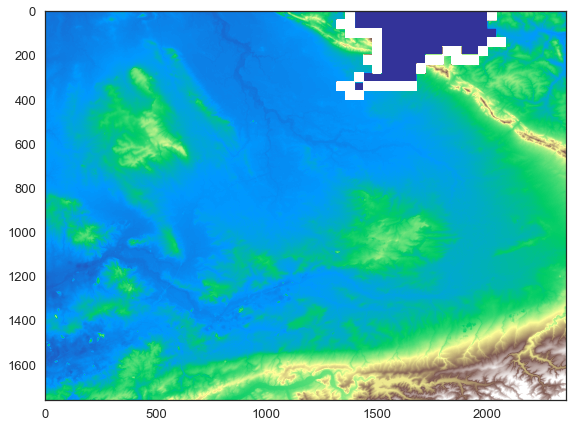

<AxesSubplot:>

In [33]:
from rasterio.plot import show
show(mosaic, cmap='terrain', vmax=400)

In [34]:
mosaic = np.flipud(np.rot90(np.swapaxes(mosaic, 0, 2)[:, 0:, 0], 1))

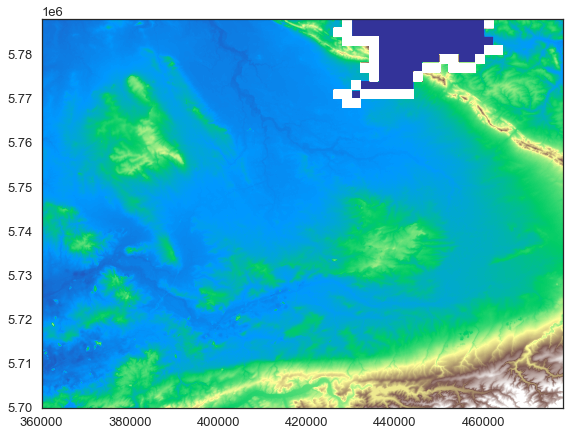

In [36]:
plt.imshow(mosaic,cmap='terrain', vmax=400, extent = [360000,478000,5700000,5788000])

In [37]:
gg.raster.save_as_tiff('C:/users/alexa/Desktop/Muenster/DEM50.tiff', np.flipud(mosaic), extent=[360000,478000,5700000,5788000], crs='EPSG:25832')

In [25]:
mosaic1, out_trans1 = merge(src_files_to_mosaic, res=25)

In [96]:
mosaic2, out_trans2 = merge(src_files_to_mosaic, res=10)

In [97]:
mosaic3, out_trans3 = merge(src_files_to_mosaic, res=5)

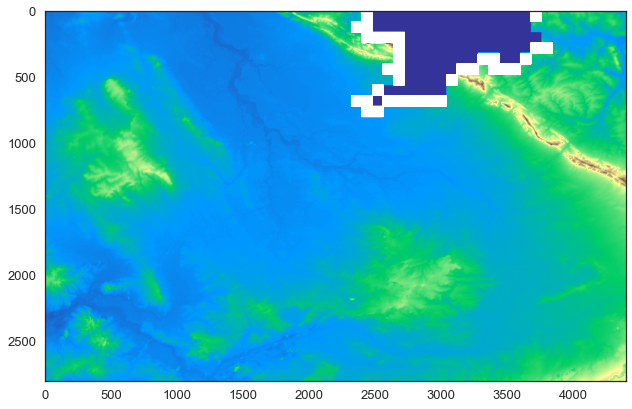

<AxesSubplot:>

In [91]:
from rasterio.plot import show
show(mosaic1, cmap='terrain', vmax=400)

In [92]:
mosaic1 = np.flipud(np.rot90(np.swapaxes(mosaic1, 0, 2)[:, 0:, 0], 1))

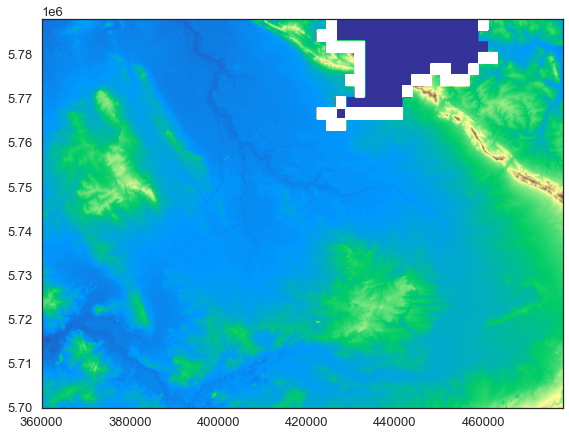

In [93]:
plt.imshow(mosaic1,cmap='terrain', vmax=400, extent = [360000,478000,5700000,5788000])

In [94]:
gg.raster.save_as_tiff('C:/users/alexa/Desktop/Muenster/DEM25.tiff', np.flipud(mosaic), extent=[360000,478000,5700000,5788000], crs='EPSG:25832')

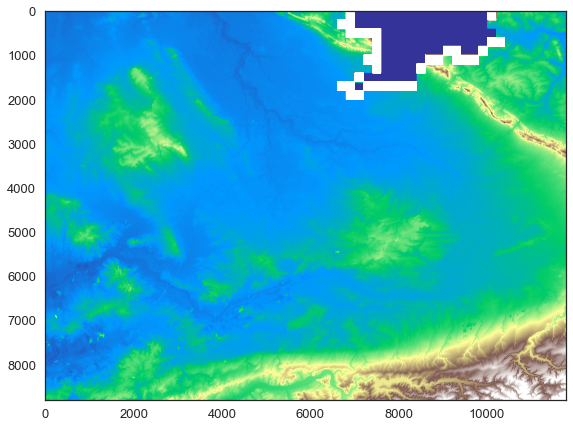

<AxesSubplot:>

In [98]:
from rasterio.plot import show
show(mosaic2, cmap='terrain', vmax=400)

In [99]:
mosaic2 = np.flipud(np.rot90(np.swapaxes(mosaic2, 0, 2)[:, 0:, 0], 1))

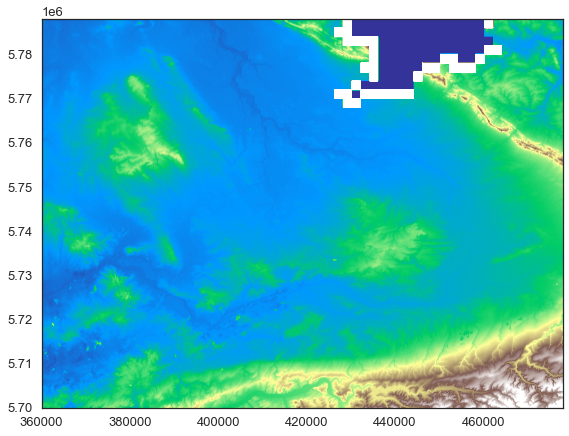

In [100]:
plt.imshow(mosaic2,cmap='terrain', vmax=400, extent = [360000,478000,5700000,5788000])

In [101]:
gg.raster.save_as_tiff('C:/users/alexa/Desktop/Muenster/DEM15.tiff', np.flipud(mosaic), extent=[360000,478000,5700000,5788000], crs='EPSG:25832')

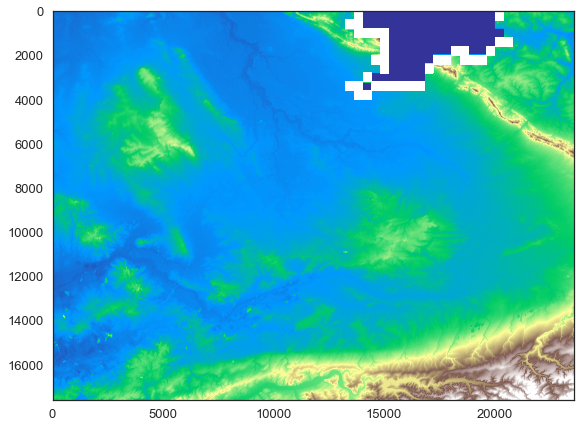

<AxesSubplot:>

In [102]:
from rasterio.plot import show
show(mosaic3, cmap='terrain', vmax=400)

In [103]:
mosaic3 = np.flipud(np.rot90(np.swapaxes(mosaic3, 0, 2)[:, 0:, 0], 1))

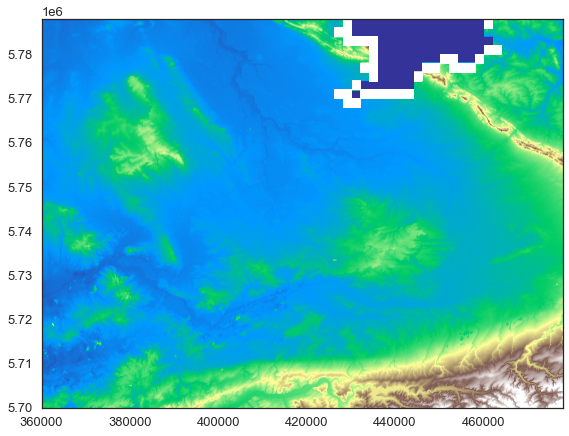

In [104]:
plt.imshow(mosaic3,cmap='terrain', vmax=400, extent = [360000,478000,5700000,5788000])

In [105]:
gg.raster.save_as_tiff('C:/users/alexa/Desktop/Muenster/DEM10.tiff', np.flipud(mosaic), extent=[360000,478000,5700000,5788000], crs='EPSG:25832')

# WFS Services

In [39]:
from requests import Request

In [74]:
from owslib.wfs import WebFeatureService
wfs = WebFeatureService(url='http://www.bml3.nrw.de/service/bml')
# wfs = gg.wms.load_wfs(url)

In [44]:
[operation.name for operation in wfs.operations]

['GetCapabilities', 'DescribeFeatureType', 'GetFeature']

In [45]:
list(wfs.contents)

['bml:Borehole']

In [46]:
layer = 'bml:Borehole'

In [60]:
[op.name for op in wfs.operations]

['GetCapabilities', 'DescribeFeatureType', 'GetFeature']

In [56]:
wfs.getOperationByName('GetFeature').methods

[{'type': 'Get', 'url': 'http://www.bml3.nrw.de/service/bml?'},
 {'type': 'Post', 'url': 'http://www.bml3.nrw.de/service/bml'}]

In [66]:
wfs.getOperationByName('GetFeature').srsName

AttributeError: 'OperationMetadata' object has no attribute 'srsName'

In [57]:
wfs.getOperationByName('GetFeature').formatOptions

['{http://www.opengis.net/wfs}GML2']

In [58]:
wfs['bml:Borehole'].boundingBox

(338000.0, 5675000.0, 682000.0, 5990000.0, urn:ogc:def:crs:EPSG::5555)

In [50]:
wfs['bml:Borehole'].crsOptions

[urn:ogc:def:crs:EPSG::5555]

In [ ]:
wfs['bml:Borehole'].

In [64]:
wfs.getOperationByName('DescribeFeatureType').methods

[{'type': 'Get', 'url': 'http://www.bml3.nrw.de/service/bml?'},
 {'type': 'Post', 'url': 'http://www.bml3.nrw.de/service/bml'}]

In [107]:
wfs.get_schema('bml:Borehole')

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

In [67]:
wfs.getfeature?

In [75]:
wfs.getfeature(typename='bml:Borehole', bbox=(338000.0, 5675000.0, 682000.0, 5990000.0), srsname='urn:ogc:def:crs:EPSG::5555', outputFormat='text/xml; subtype=gml/3.2.1')

ServiceException: Request rejected due to errors.
	InternalExceptionCode: iiFeatureTypeNotSupported.  
	Reason: 

The requested FeatureType "b" is unknown.

In [47]:
response = wfs.getfeature(typename='bml:Borehole')

ServiceException: Request rejected due to errors.
	InternalExceptionCode: iiFeatureTypeNotSupported.  
	Reason: 

The requested FeatureType "b" is unknown.

In [90]:
wfs.version

'1.0.0'

In [89]:
def return_wfs_url(service, version, identifier, form, extent, name):
    
    url = service + '?' + \
    'REQUEST=GetFeature' + '&' + \
    'SERVICE=WFS' + '&' + \
    'VERSION=' + str(version) + '&' + \
    'TYPENAME=' + identifier + '&' + \
    'FORMAT=' + form + '&' + \
    'SUBSET=x(' + str(extent[0]) + ',' + str(extent[1]) + ')' + '&' +\
    'SUBSET=y(' + str(extent[2]) + ',' + str(extent[3]) + ')' + '&' +\
    'OUTFILE=' + name
    return url

url = return_wfs_url('http://www.bml3.nrw.de/service/bml', wfs.version, 'bml:Borehole', '{http://www.opengis.net/wfs}GML2',[290000, 292000,5625000,5627000], 'test')
url

'http://www.bml3.nrw.de/service/bml?REQUEST=GetFeature&SERVICE=WFS&VERSION=1.0.0&TYPENAME=bml:Borehole&FORMAT={http://www.opengis.net/wfs}GML2&SUBSET=x(290000,292000)&SUBSET=y(5625000,5627000)&OUTFILE=test'

In [85]:
import urllib.request
# req = urllib.request.urlopen(url)
file = urllib.request.urlretrieve(url, 'test')
file

('test', <http.client.HTTPMessage at 0x27a04429cc8>)

# Save as GemPy df

In [ ]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
interfaces= gg.vector.extract_coordinates(interfaces,dem,inplace=False)

In [ ]:
interfaces = gg.utils.convert_to_gempy_df(interfaces)
interfaces.head()

In [ ]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
interfaces= gg.vector.extract_coordinates(interfaces,dem,inplace=False)

In [ ]:
interfaces['dip'] = 50
interfaces['azimuth'] = 100

In [ ]:
orientations= gg.utils.convert_to_gempy_df(interfaces)
orientations.head()

# Create Surface Color Dict

In [ ]:
gg.utils.create_surface_color_dict('../../gemgis/data/Test1/style1.qml')

# Load KML Files

In [ ]:
import fiona
import geopandas as gpd

gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
# empty GeoDataFrame
gdf = gpd.GeoDataFrame()

# iterate over layers
for layer in fiona.listlayers('../../gemgis/data/Test1/KML/interfaces1.kml'):
    s = gpd.read_file(
        '../../gemgis/data/Test1/KML/interfaces1.kml', driver='KML', layer=layer)
    gdf = gdf.append(s, ignore_index=True)


gdf.head()

In [ ]:
gpd.read_file(
    '../../gemgis/data/Test1/KML/interfaces1.kml', driver='KML', layer=layer)

In [ ]:
import os
from collections import OrderedDict
import fiona
import logging
import sys
from fiona.crs import from_epsg
from shapely.geometry import shape

# with fiona.open('workouts.gpkg') as c:
#     for f in c:
#         print(shape(f['geometry']))

logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)

print(fiona.__version__)
print(fiona.get_gdal_release_name())

fiona.drvsupport.supported_drivers['KML'] = 'rw'

fname = 'test.kml'
if os.path.exists(fname):
    os.remove(fname)

schema = {'properties': OrderedDict([
    ('Name', 'str'),
    ('Description', 'str'),
    ('id', 'str'),
    ('distance', 'float'),
    ('speed', 'float'),
    ('time', 'int'),
    ('activity_name', 'str'),
    ('Description', 'str'),
    ('date', 'str'), ]),
    'geometry': 'LineString'}

with fiona.open("test.kml",
                driver='KML',
                layer="walk",
                mode='w',
                schema=schema,
                crs=from_epsg(4326)) as c:
    f = {
        'geometry': {'type': 'LineString',
                     'coordinates': [(151.148538533, -33.6983890381), (151.148168283, -33.6982220137),
                                     (151.146898883, -33.6979895788), (151.146154005, -33.6978891607)]},
        'properties': OrderedDict([
            ('Name', 'Walked 3.97 km on 22/1/17'),
            ('Description', 'test'),
            ('distance', 3.96978493824),
            ('id', '1965703340'),
            ('speed', 1.397811597971831),
            ('time', 2840),
            ('date', '01/22/2017'),
            ('activity_name', 'Walk')
        ])
    }
    c.write(f)

with open(fname) as f:
    print(f.read())

# Read CSV as GDF

In [ ]:
import sys
sys.path.append('../../gemgis')
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyvista as pv
import gemgis as gg
from matplotlib.colors import ListedColormap
from scipy.ndimage.interpolation import map_coordinates
from mpl_toolkits.axes_grid1 import make_axes_locatable

print(gg)
print(gpd.__version__)

In [ ]:
gdf = gg.utils.read_csv('../../gemgis/data/Test1/CSV/interfaces1.csv', crs = 'EPSG:4326', xcol='xcoord', ycol='ycoord')
gdf.crs

# Create GemPyData Object

The results of the data preparation step can now be saved in a GemPyData Object, introduced in GemGIS. It contains information such as the model name, the crs, the different dataframes, the section dict, the surface colors and more information to come. 

In [ ]:
data = gg.GemPyData()
print(data.crs)

In [ ]:
data.model_name = 'Model1'
data.model_name

In [ ]:
data.crs = 'EPSG:4326'
data.crs

In [ ]:
data = gg.GemPyData(crs = 'EPSG:4326')
print(data.crs)

In [ ]:
data.interfaces = interfaces
data.interfaces.head()

In [ ]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')

data.to_gempy_df(interfaces, cat='interfaces', dem=dem)
data.interfaces.head()

In [ ]:
data.orientations = orientations
data.orientations.head()

In [ ]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')

interfaces['dip'] = 50
interfaces['azimuth'] = 100

data.to_gempy_df(interfaces, cat='orientations', dem=dem)
data.orientations.head()

In [ ]:
data.section_dict = section_dict
data.section_dict

In [ ]:
custom_sections = gpd.read_file('../../gemgis/data/Test1/customsection1_line.shp')

data.to_section_dict(custom_sections, section_column='section')

data.section_dict

In [ ]:
resolution = gg.utils.set_resolution(50,50,50)
resolution

In [ ]:
data.resolution = resolution
data.resolution

In [ ]:
data.resolution = [50,50,50]
data.resolution

In [ ]:
data.set_resolution(50,50,50)
data.resolution

In [ ]:
extent = gg.utils.set_extent(0,100,0,100,0,100)
extent

In [ ]:
data.extent = extent
data.extent

In [ ]:
data.extent = [0,100,0,100,0,100]
data.extent

In [ ]:
data.set_extent(0,100,0,100,0,100)
data.extent

In [ ]:
data.surface_colors = gg.utils.create_surface_color_dict('../../gemgis/data/Test1/style1.qml')
data.surface_colors

In [ ]:
data.to_surface_color_dict('../../gemgis/data/Test1/style1.qml')
data.surface_colors

In [ ]:
data